<a href="https://www.kaggle.com/code/dascient/unidentified-anomalous-phenomena-a-deep-dive?scriptVersionId=126554279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NUFORC Data Exploitation 🧮AI-ML-DS📊 & More to Come🪐
## 🔭Research, 📈Analysis, 🌌A Multiversal Collaborative Effort of Investigating Something More Extraordinary Than Ourselves, & 🤖Pure Enjoyment

### An attempt to exploit NUFORC's public 📘 reports of first-hand sightings/experiences of [Anomalous Phenomena](https://en.wikipedia.org/wiki/Association_for_the_Scientific_Study_of_Anomalous_Phenomena). Please see [NUFORC](https://nuforc.org/databank/)'s webpage to get a better understanding of the nature of the data. 


#### This project is also very much a work-in-progress. We intend to leverage other public/open-source databases to further our research (i.e. 🛩️commercial air traffic data, 🚁multi-domain track-correlation analysis, and so on) & investigative methods by aiming to aggregate pertinent resources that will serve to augment reproducible scalability of it's applications & the overall *purpose* of our ultimate mission. 

### See Contributors & Collaborators below.

## 🛥️Ultimate Mission🛩️
To provide a proof-of-concept of a all-domain/multi-agency analytic effort that would address [national priority needs](https://en.m.wikipedia.org/wiki/National_Intelligence_Priorities_Framework#:~:text=The%20National%20Intelligence%20Priorities%20Framework,summarizes%20the%20United%20States%27s%20intelligence) of the [ODNI](https://www.dni.gov/files/ODNI/documents/assessments/Unclassified-2022-Annual-Report-UAP.pdf)'s rising [AARO](https://en.m.wikipedia.org/wiki/All-domain_Anomaly_Resolution_Office)-focused mandates & delegations spread throughout the IC in support of this particular subject matter - as well as what may come forth beyond it's research & potentially disruptive scientific discoveries.

We also aim to provide insights derived from the latest [JWST](https://webb.nasa.gov/) research & findings, as we cannot philosophicaly rule out the idea that we are alone. We hope to uncover the idea that, in fact, "...we are a part of the norm - we are not an exception." -[C. Mellon](https://www.christophermellon.net), former DASDI. 

#### *I hope this serves something delightful.*

#  Load our packages & NUFORC's 80K dataset as a csv.

In [1]:
# This Python 3 Analysis of NUFORC's database contains 80,0000 rows of reported sightings. 
# I'm so glad this one came with Lat/Long,s for me to play with.

# for the sake of expeditious analysis
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS
from geopandas import GeoDataFrame
import matplotlib.colors as colors
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufo-sightings/ufos.csv


# What does the data look like?

#### Typical reporting-type dataset - City, State, Shapes seen, Observation duration, geolocation.

##### For now, disregard column 'verified'. It is a randomly generated binary vector that will later be used to prove AI-ML modeling.

In [2]:
# loading...
df = pd.read_csv('/kaggle/input/ufo-sightings/ufos.csv',header=0)

# drop some columns, for now
df = df.drop(columns=['datetime','duration (hours/min)'])

# date posted deemed to be easily conveible to timestamp values, so i'm gonna work with that for now.
df['date posted'] = df['date posted'].astype('datetime64[ns]')

# random binary column for future AI-ML modeling.
df['verified'] = np.random.choice([1,0], df.shape[0])

# length of comments
df['comment_length'] = [len(str(v)) for i,v in df.comments.items()]

# show
print("Reporting Dataframe")
df.head(5).sort_values('date posted',ascending=False).reset_index(drop=True)

Reporting Dataframe


city state country     shape  duration (seconds)  \
0  chester (uk/england)   NaN      gb    circle                20.0   
1          lackland afb    tx     NaN     light              7200.0   
2            san marcos    tx      us  cylinder              2700.0   
3               kaneohe    hi      us     light               900.0   
4                  edna    tx      us    circle                20.0   

                                            comments date posted   latitude  \
0  Green/Orange circular disc over Chester&#44 En...  2008-01-21  53.200000   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  2005-12-16  29.384210   
2  This event took place in early fall around 194...  2004-04-27  29.883056   
3  AS a Marine 1st Lt. flying an FJ4B fighter/att...  2004-01-22  21.418056   
4  My older brother and twin sister were leaving ...  2004-01-17  28.978333   

    longitude  verified  comment_length  
0   -2.916667         1              51  
1  -98.581082         0              95  
2  -97.941111         0             135  
3 -157.803611         1             154  
4  -96.645833         1             138

## Top 20 Shapes

<AxesSubplot:>

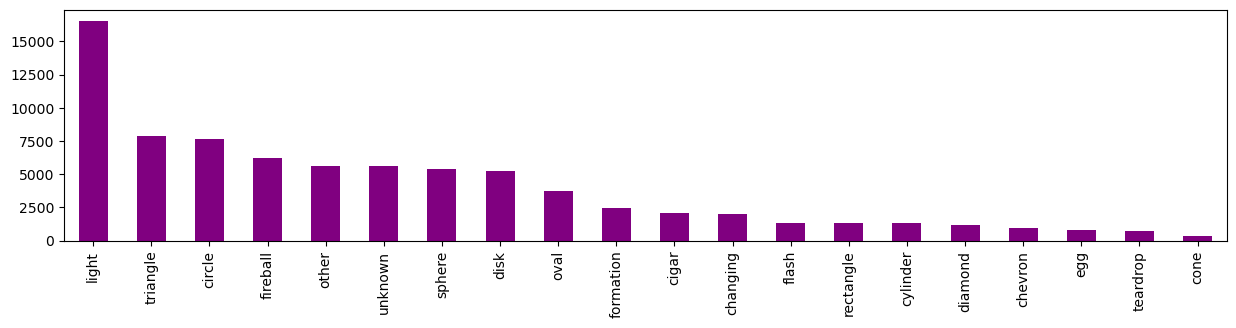

In [3]:
df['shape'].value_counts().head(20).plot(kind='bar',figsize=(15,3),color='purple')

## Top 20 Cities

<AxesSubplot:>

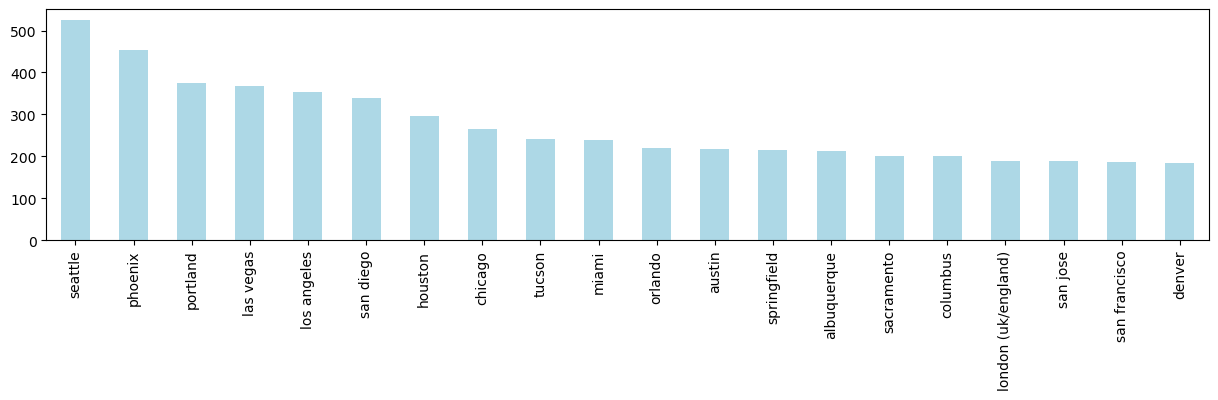

In [4]:
df['city'].value_counts().head(20).plot(kind='bar',figsize=(15,3),color='lightblue')

## Top 20 Comments

<AxesSubplot:>

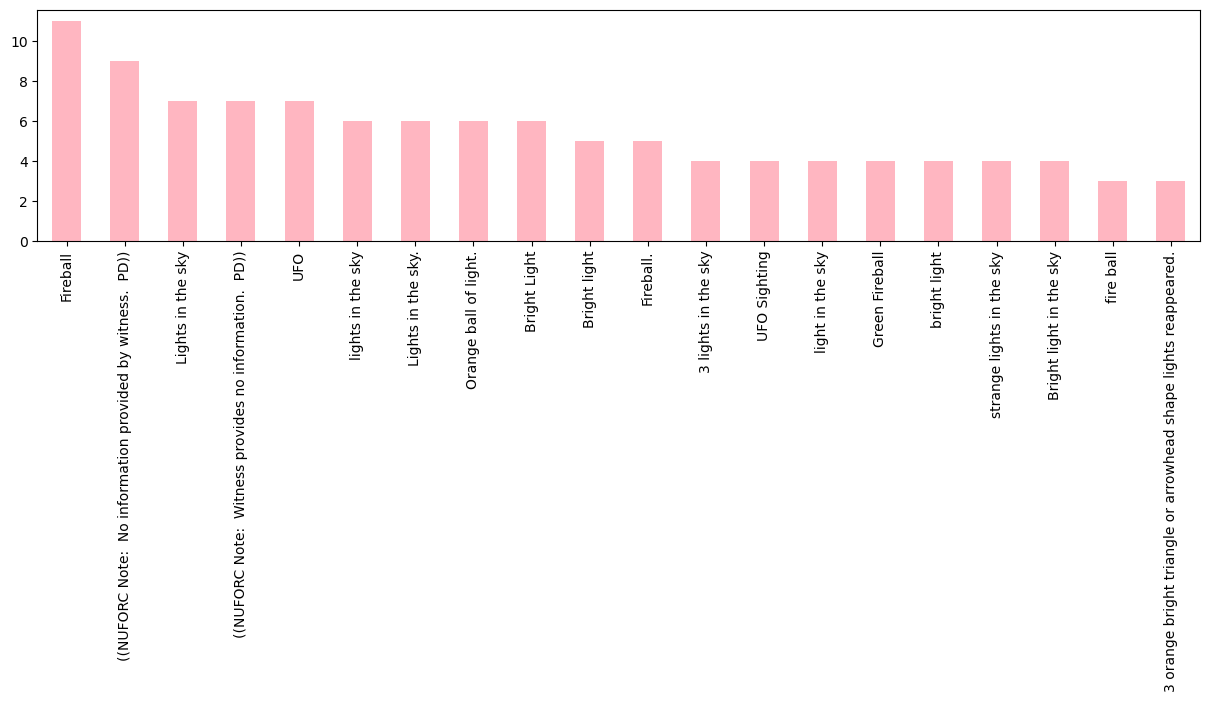

In [5]:
df['comments'].value_counts().head(20).plot(kind='bar',figsize=(15,3),color='lightpink')

## Top 20 Comment Lengths

<AxesSubplot:>

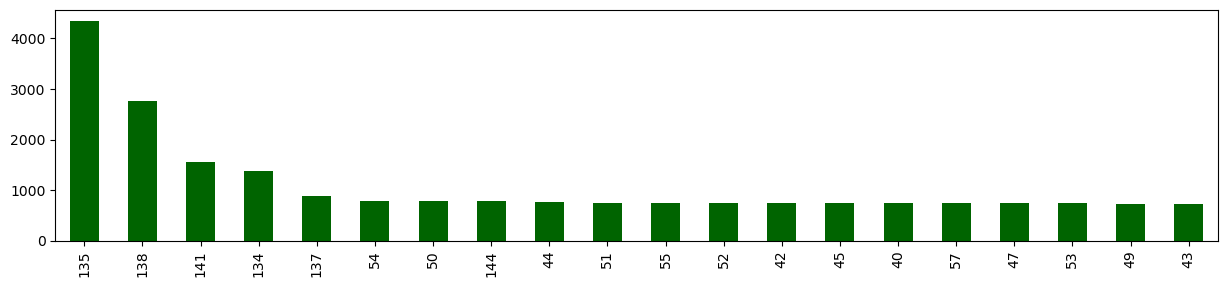

In [6]:
df['comment_length'].value_counts().head(20).plot(kind='bar',figsize=(15,3),color='darkgreen')

## Duration, Lat, Lon - numerical insight.



In [7]:
df.describe()

duration (seconds)      latitude     longitude      verified  \
count        8.033200e+04  80332.000000  80332.000000  80332.000000   
mean         9.016889e+03     38.124416    -86.772885      0.500398   
std          6.202168e+05     10.469585     39.697205      0.500003   
min          1.000000e-03    -82.862752   -176.658056      0.000000   
25%          3.000000e+01     34.134722   -112.073333      0.000000   
50%          1.800000e+02     39.411111    -87.903611      1.000000   
75%          6.000000e+02     42.788333    -78.755000      1.000000   
max          9.783600e+07     72.700000    178.441900      1.000000   

       comment_length  
count    80332.000000  
mean        82.933762  
std         39.038515  
min          1.000000  
25%         50.000000  
50%         79.000000  
75%        120.000000  
max        246.000000

#### Average duration of sighting: 9.016889e+03 seconds, or 150.28148333 mins. 

#### The Lat/Lon: 72.700000, 178.441900 - may or may not be significant. We'll see later.

# Analysis

In [8]:
# convert seconds to minutes
df["duration (minutes)"] = [int(v)/60 for i,v in df["duration (seconds)"].items()]

# let's create subsets of our 80,000 here: 
# we can implement conditionals, remove/analyze outliers, 
# & will enable for back referencing when starting to run 
# robust AI-ML modeling that would otherwise take much longer to run.

# let's create subsets from the main dataframe/reporting-data w/ respect to duration of observations
df_under100 = df[df["duration (minutes)"]<100]
df_under60 = df[df["duration (minutes)"]<60]

# shape-focused
circles = df[df['shape'] == 'circle']
lights = df[df['shape'] == 'light']
teardrops = df[df['shape'] == 'teardrop']

# year-month
df['year_month'] = df['date posted'].dt.to_period('M')

## Seaborn - CatPlot
This is a sample of 100 of the 80,0000 observations - Duration under 60 minutes. 

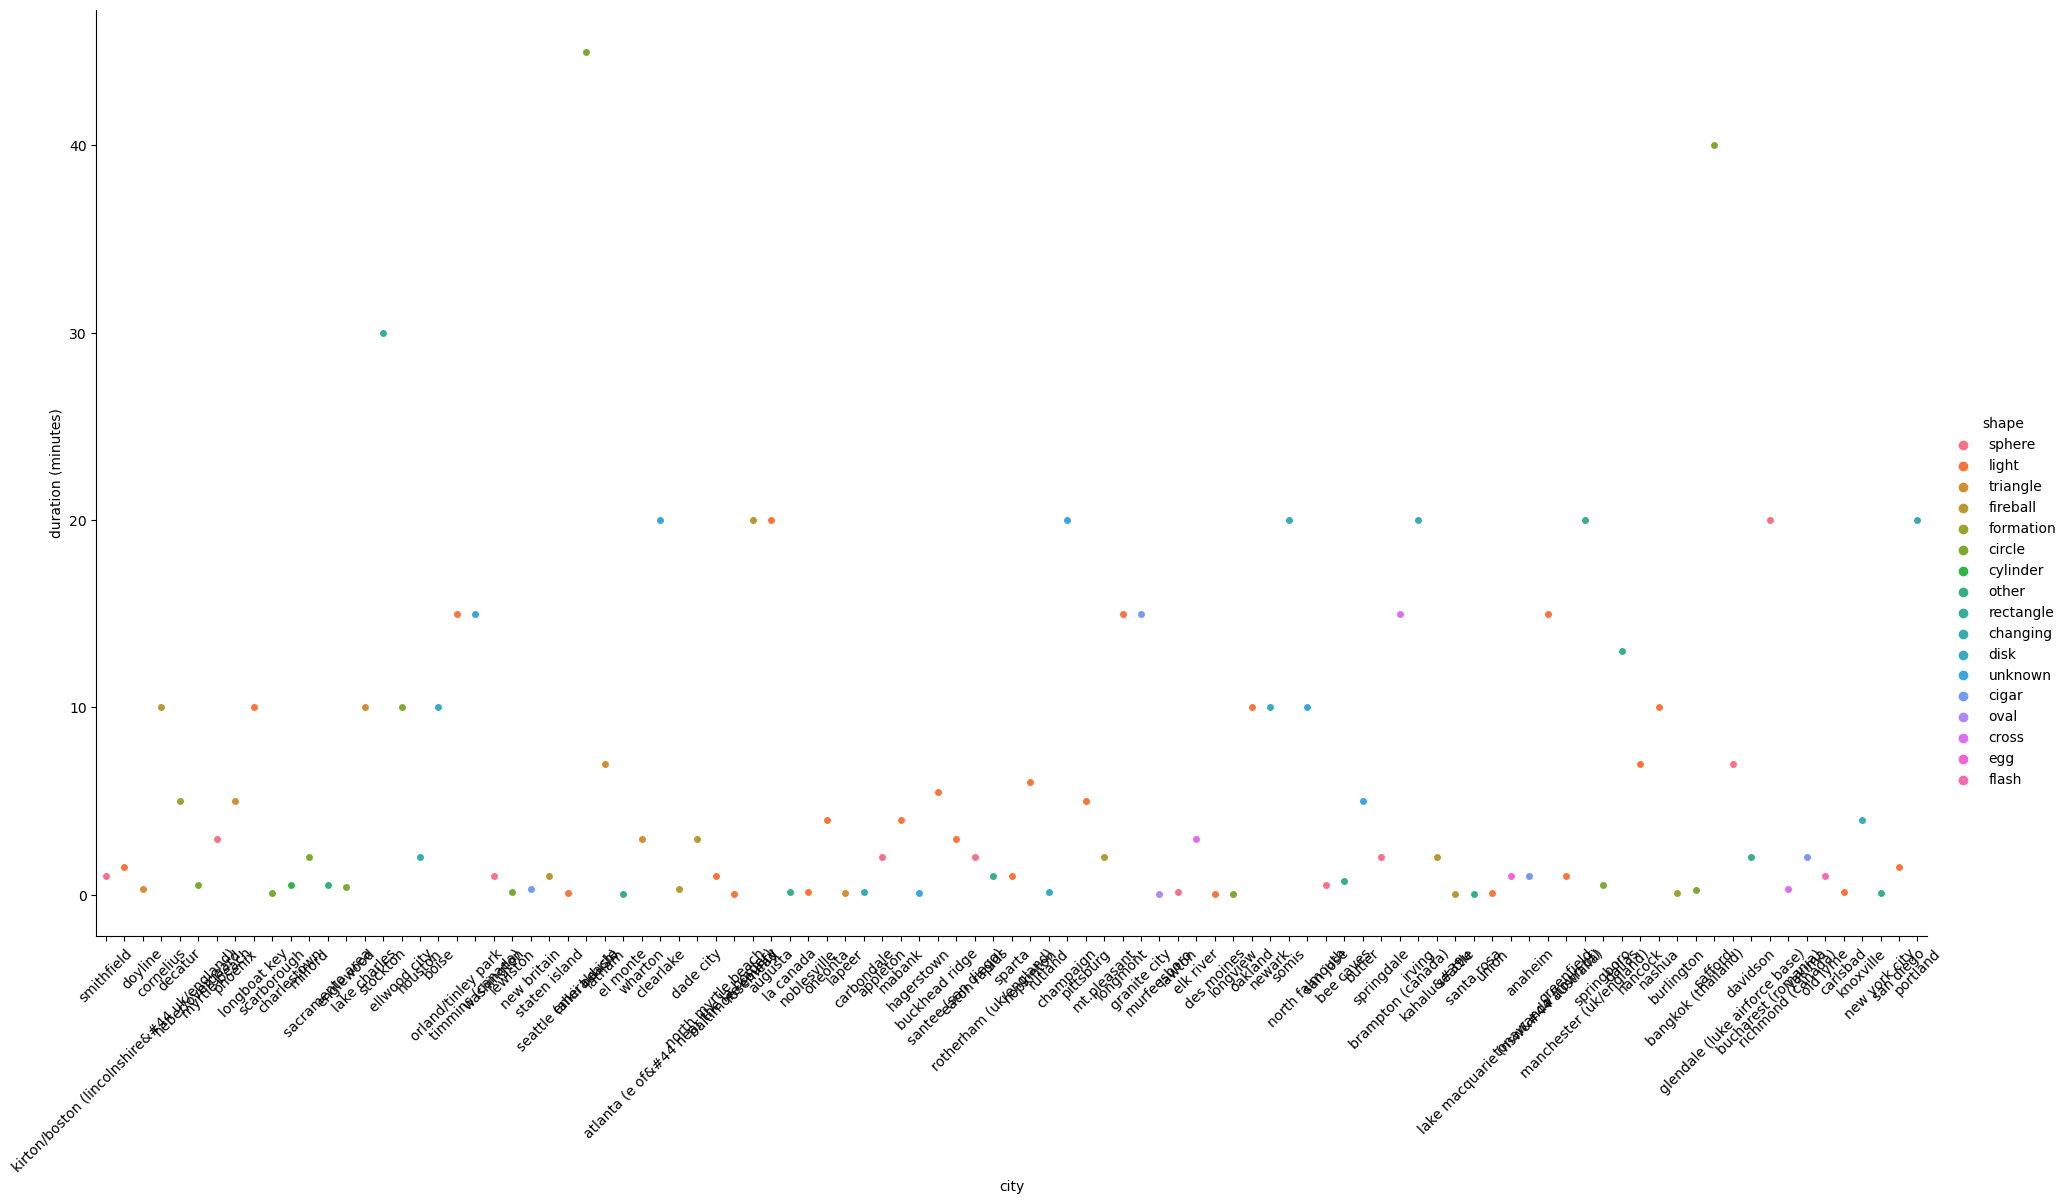

In [9]:
# plot a sample of 100 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=df_under60.sample(100), x="city", y="duration (minutes)", hue="shape", kind="swarm", height=10, aspect=2)
plt.xticks(rotation=45)
plt.show()

This is a sample of 100 observations of only shape identified as "lights".

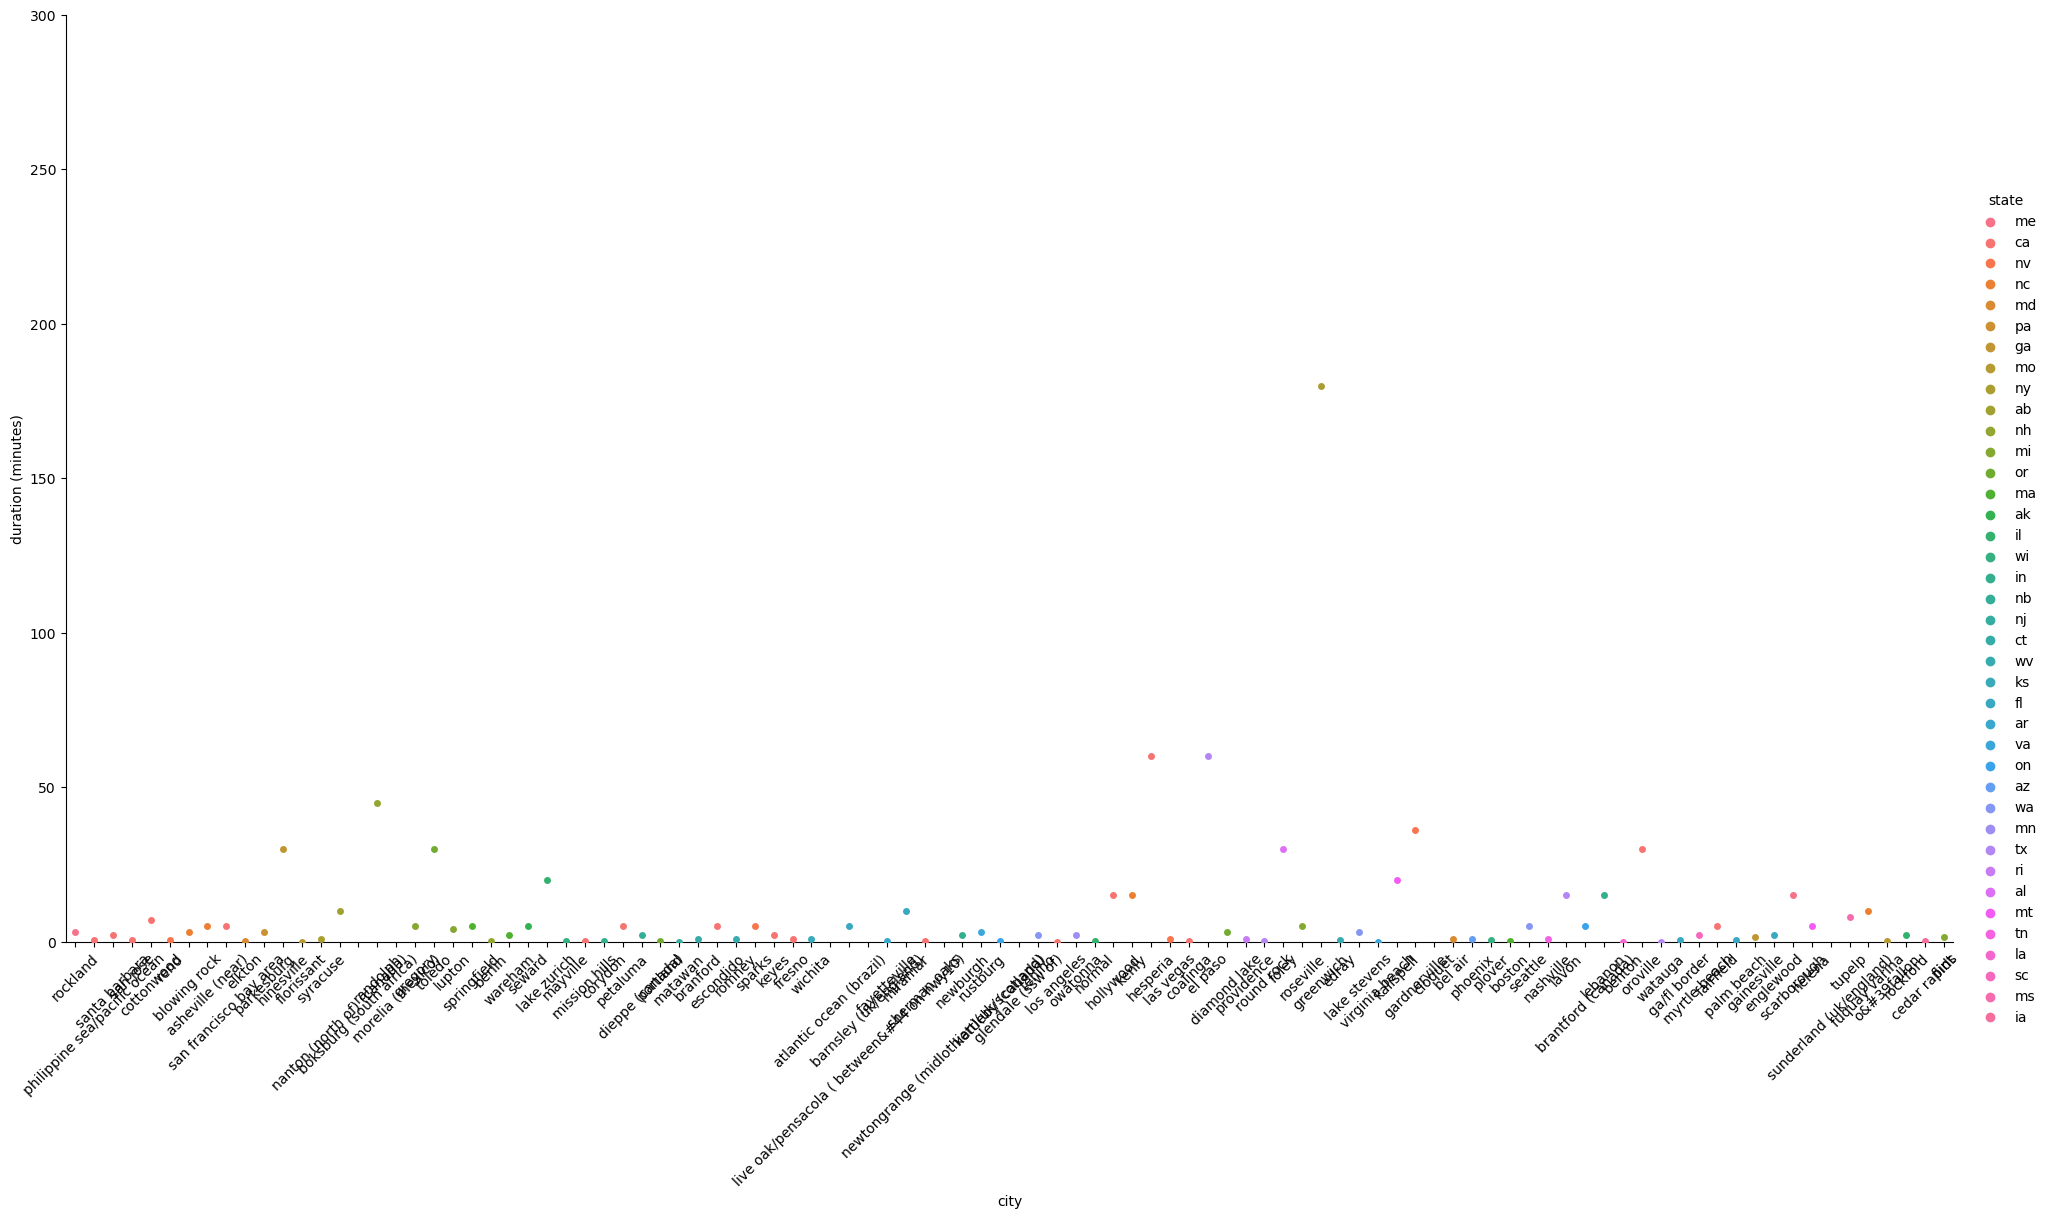

In [10]:
# plot a sample of 100 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=lights.sample(100), x="city", y="duration (minutes)", hue="state", kind="swarm", height=10, aspect=2)
plt.xticks(rotation=45)
plt.ylim(top=300)
plt.ylim(bottom=0)
plt.show()

This graph uses the "duration (minutes)" values as the x-axis &  "state" as y-axis.

Varying colors represent the object's shape. 1000 of 80,000 observations.

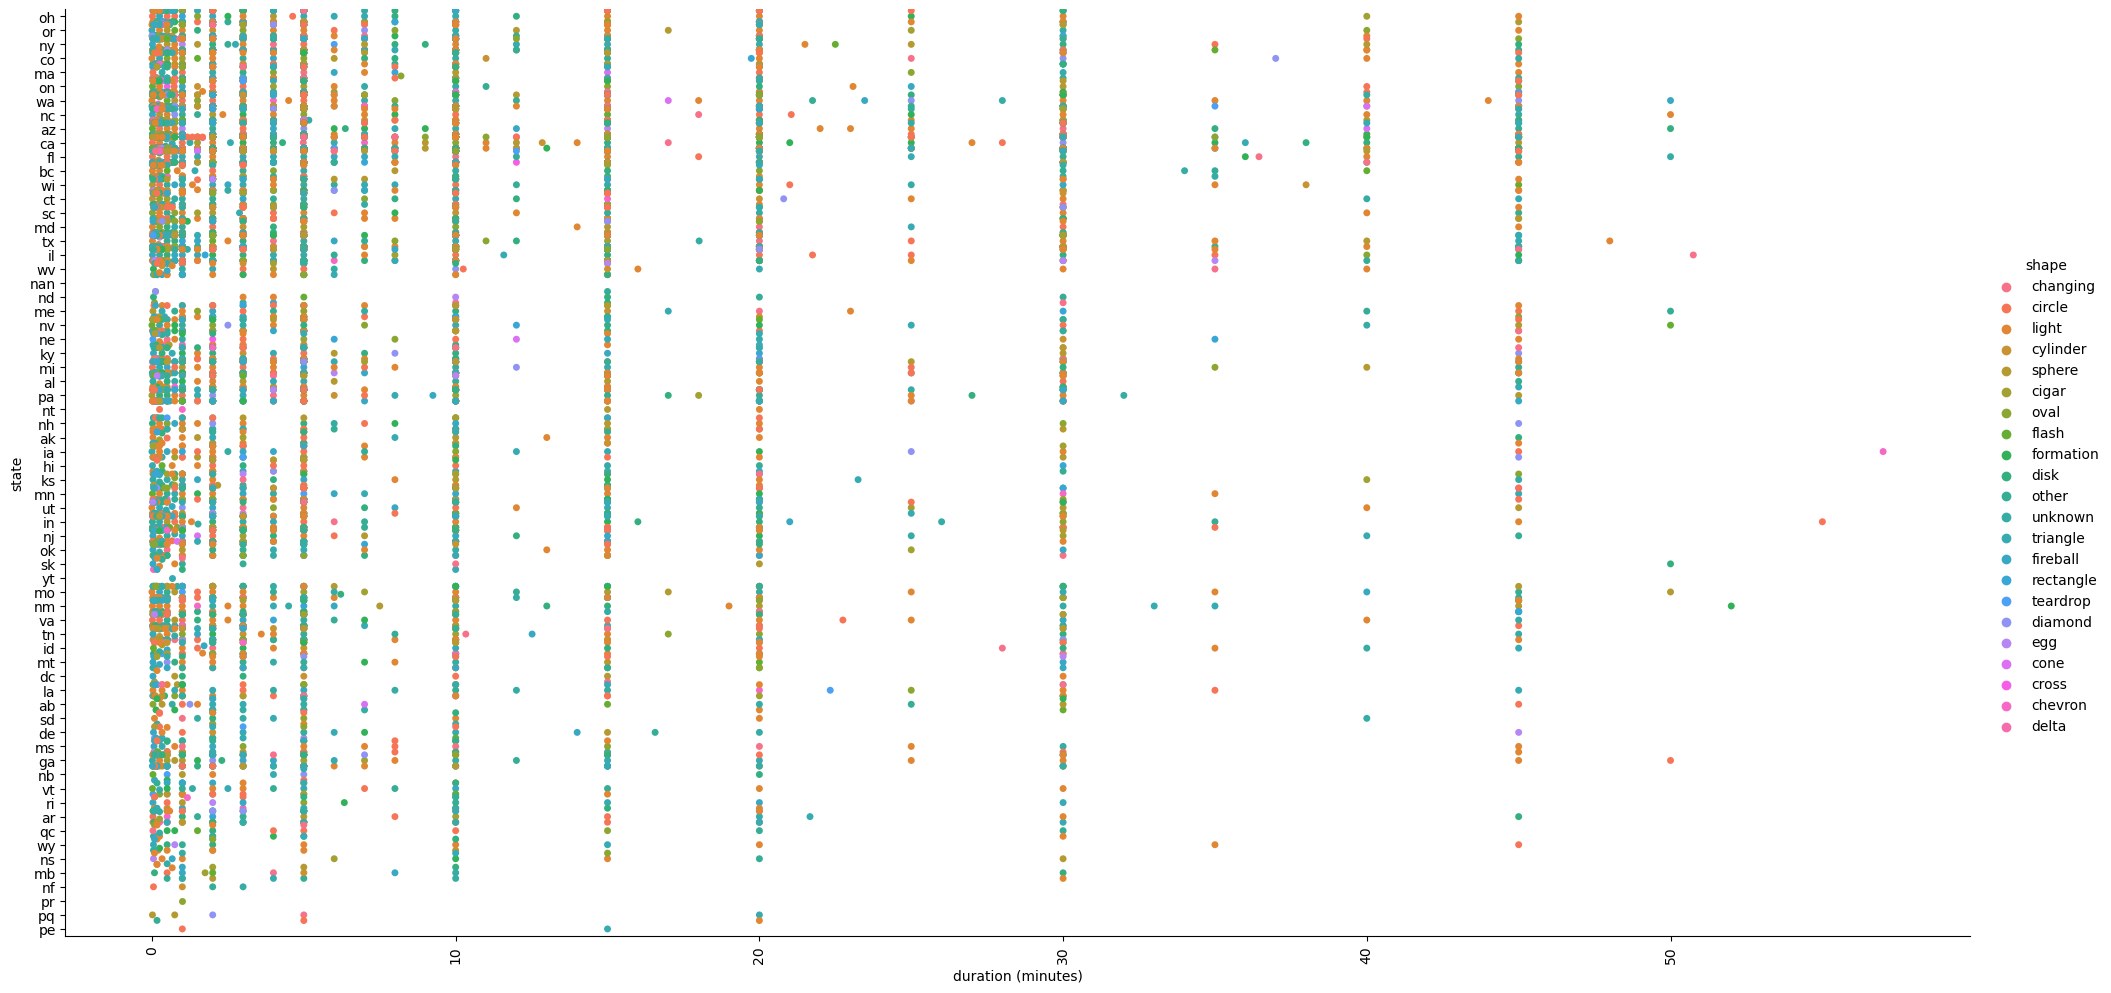

In [11]:
# i think i like the "duration" set as the x-axis & y-axis as "state", instead...
# & let's try for 10000 observations this time...
sns.catplot(data=df_under60.sample(10000), x="duration (minutes)", y="state", hue="shape", kind="swarm", height=10, aspect=2)
plt.xticks(rotation=90)
plt.show()

In [12]:
# set plot margin limits
#plt.xlim(right=xmax) #xmax is your value
#plt.xlim(left=xmin) #xmin is your value
#plt.ylim(top=ymax) #ymax is your value
#plt.ylim(bottom=ymin) #ymin is your value

## CatPlot•GeoPandas

All sightings on map. Categorized by shape.

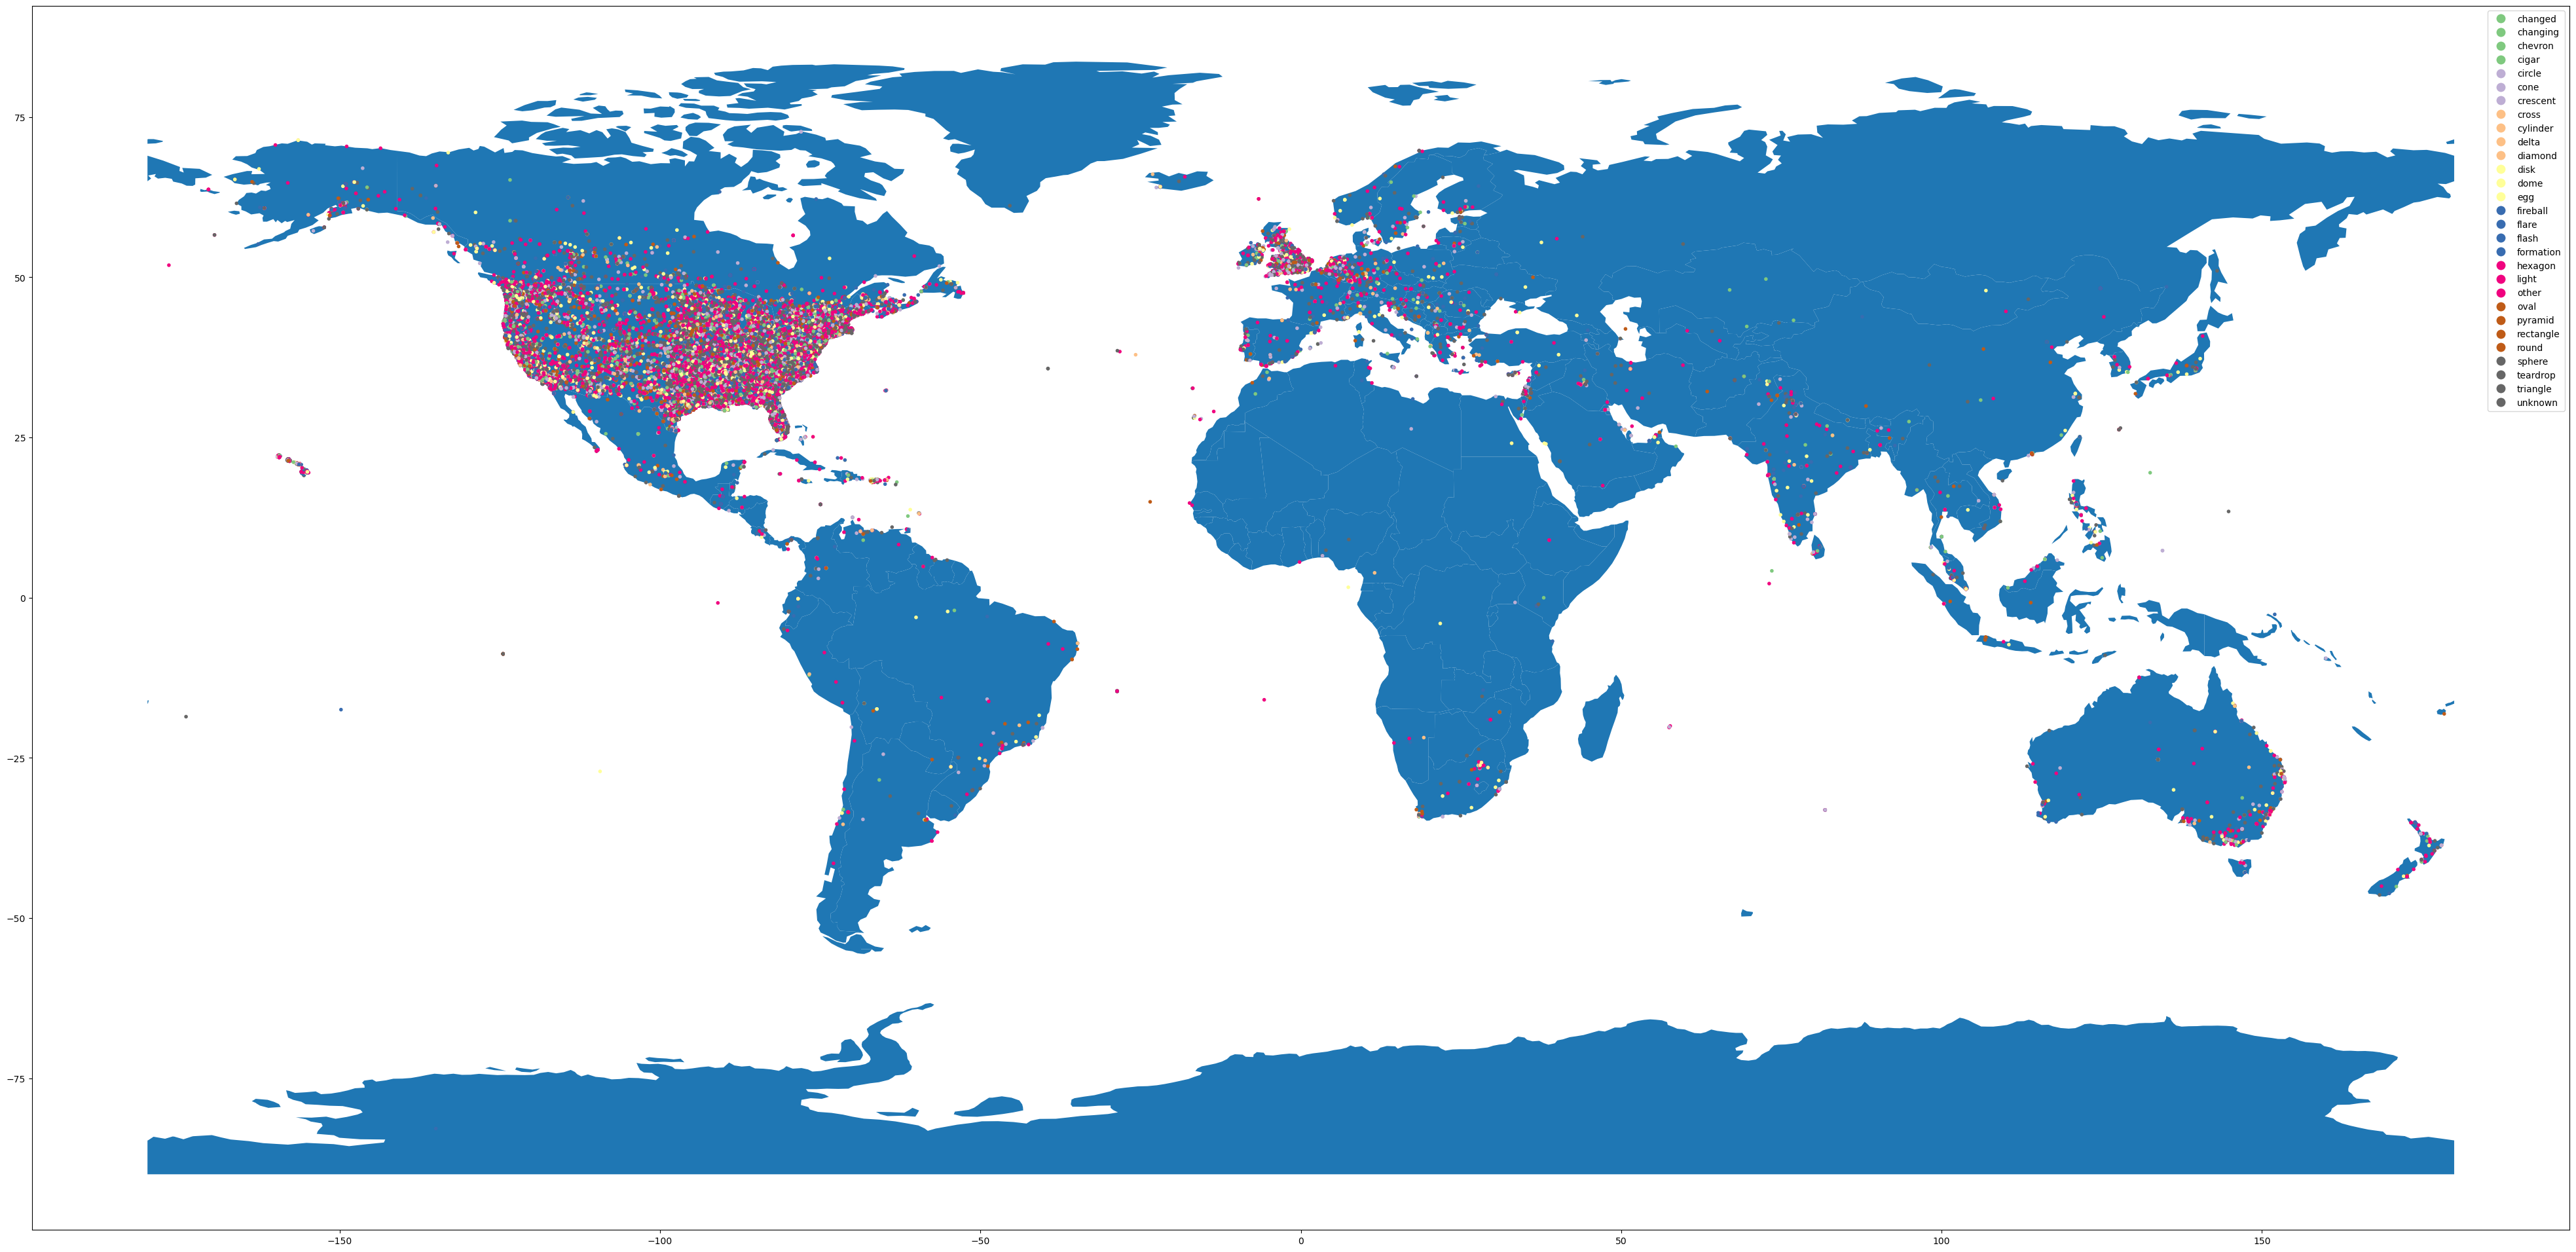

In [13]:
# geopandas
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='shape', cmap='Accent', markersize=9, legend=True);

This only shows those that were reported shape as "lights".  Categorized by length of comments.

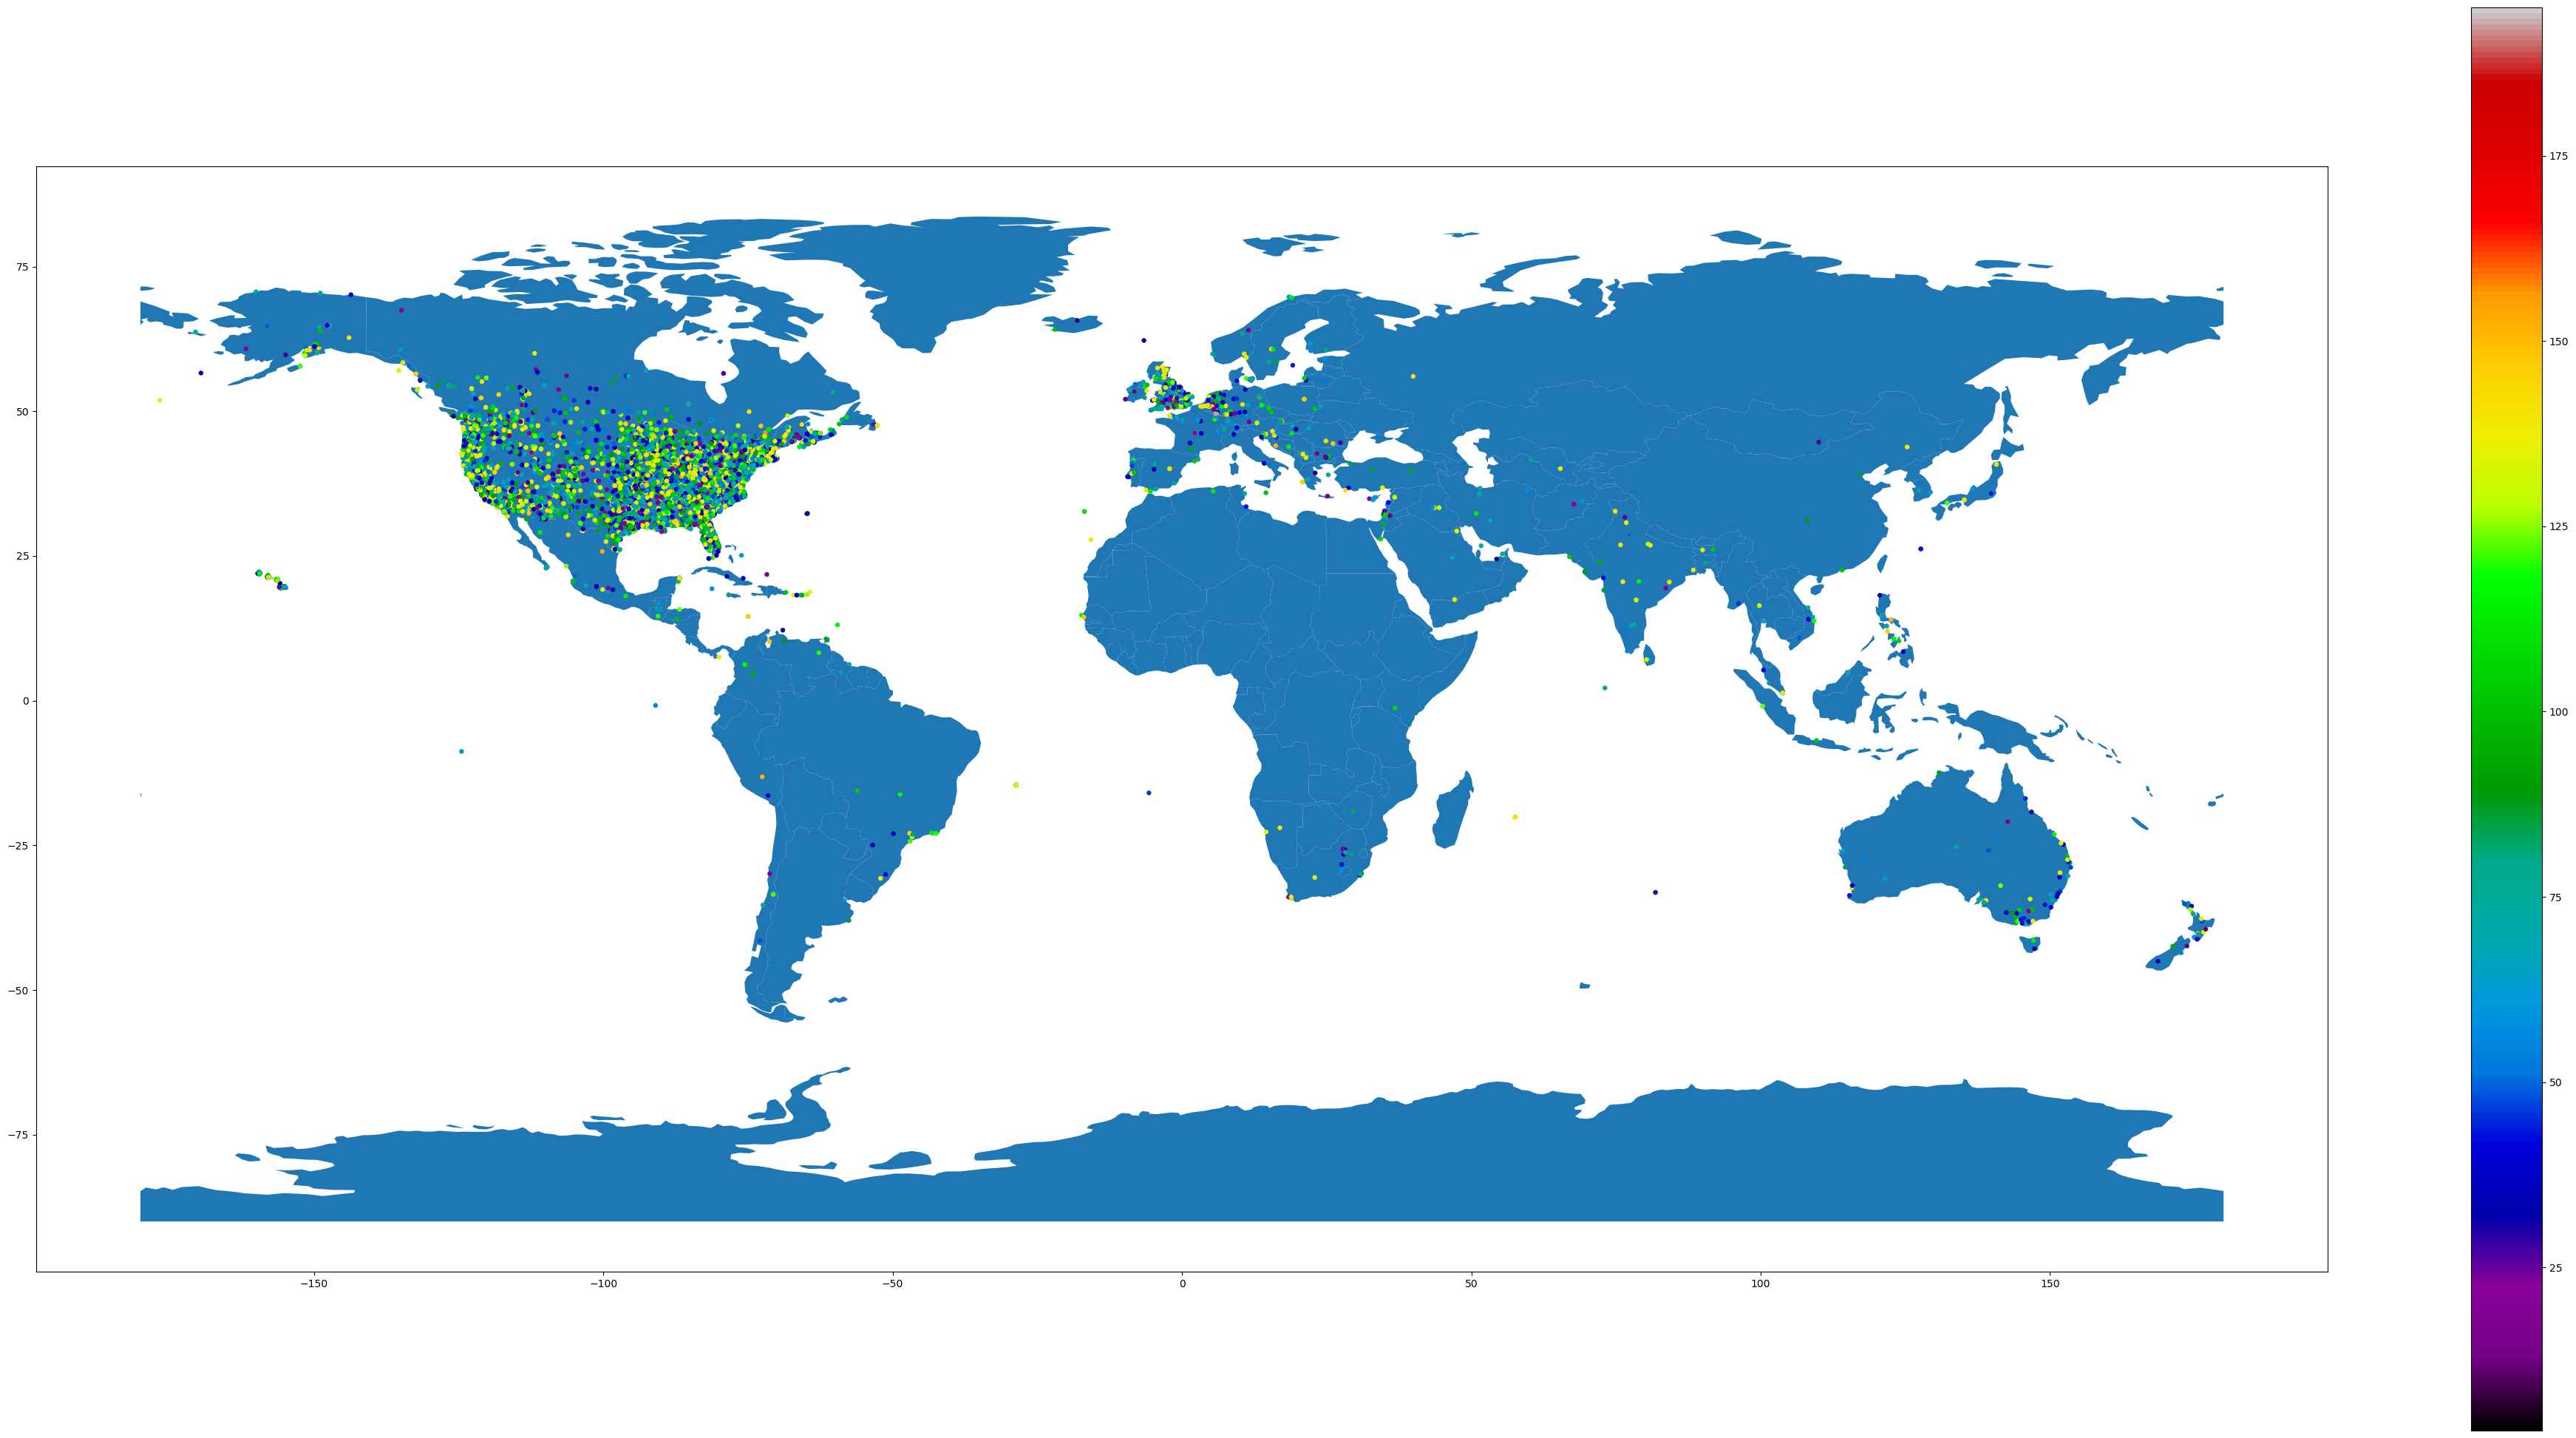

In [14]:
# lights

# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(lights['longitude'], lights['latitude'])]
gdf = GeoDataFrame(lights, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='comment_length', cmap='nipy_spectral', markersize=13, legend=True);

This only shows those that were reported shape as "teardrops". Categorized by length of comments.

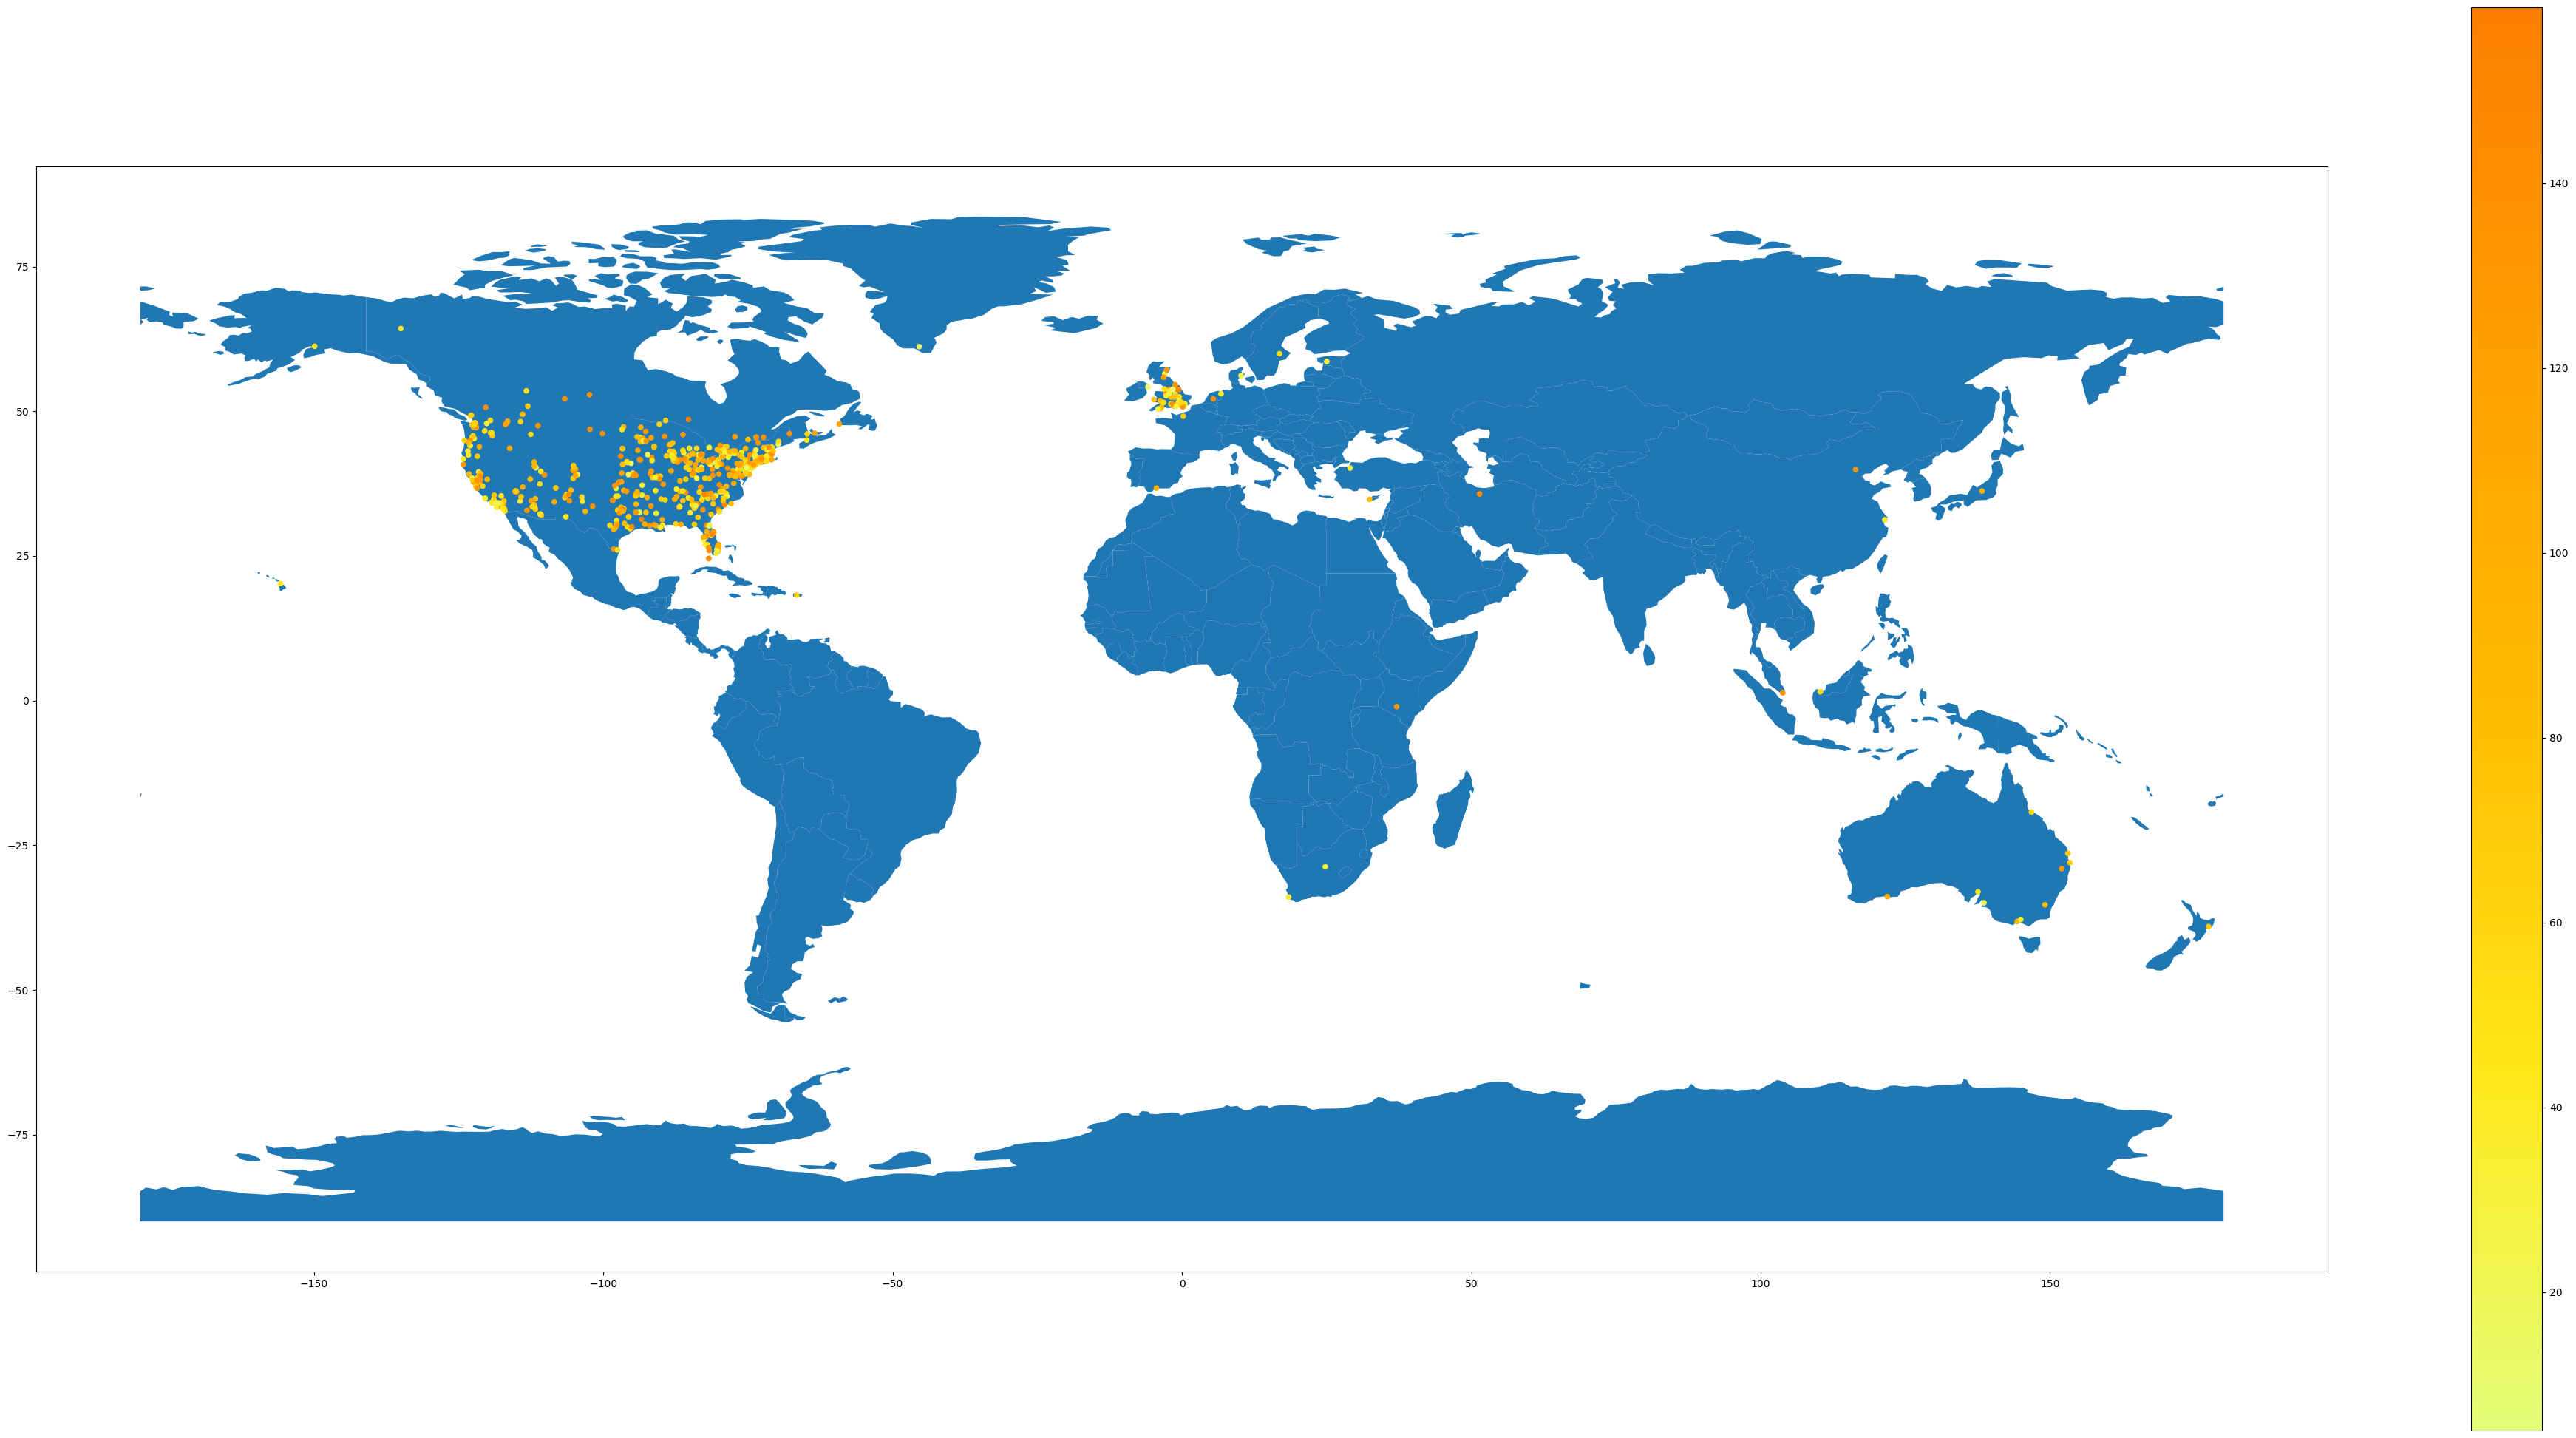

In [15]:
# teardrops

# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(teardrops['longitude'], teardrops['latitude'])]
gdf = GeoDataFrame(teardrops, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='comment_length', cmap='Wistia', markersize=20, legend=True);

# K. Koble
## Shape v Duration

Observations under 60 minutes, sample of 1000/80,000.

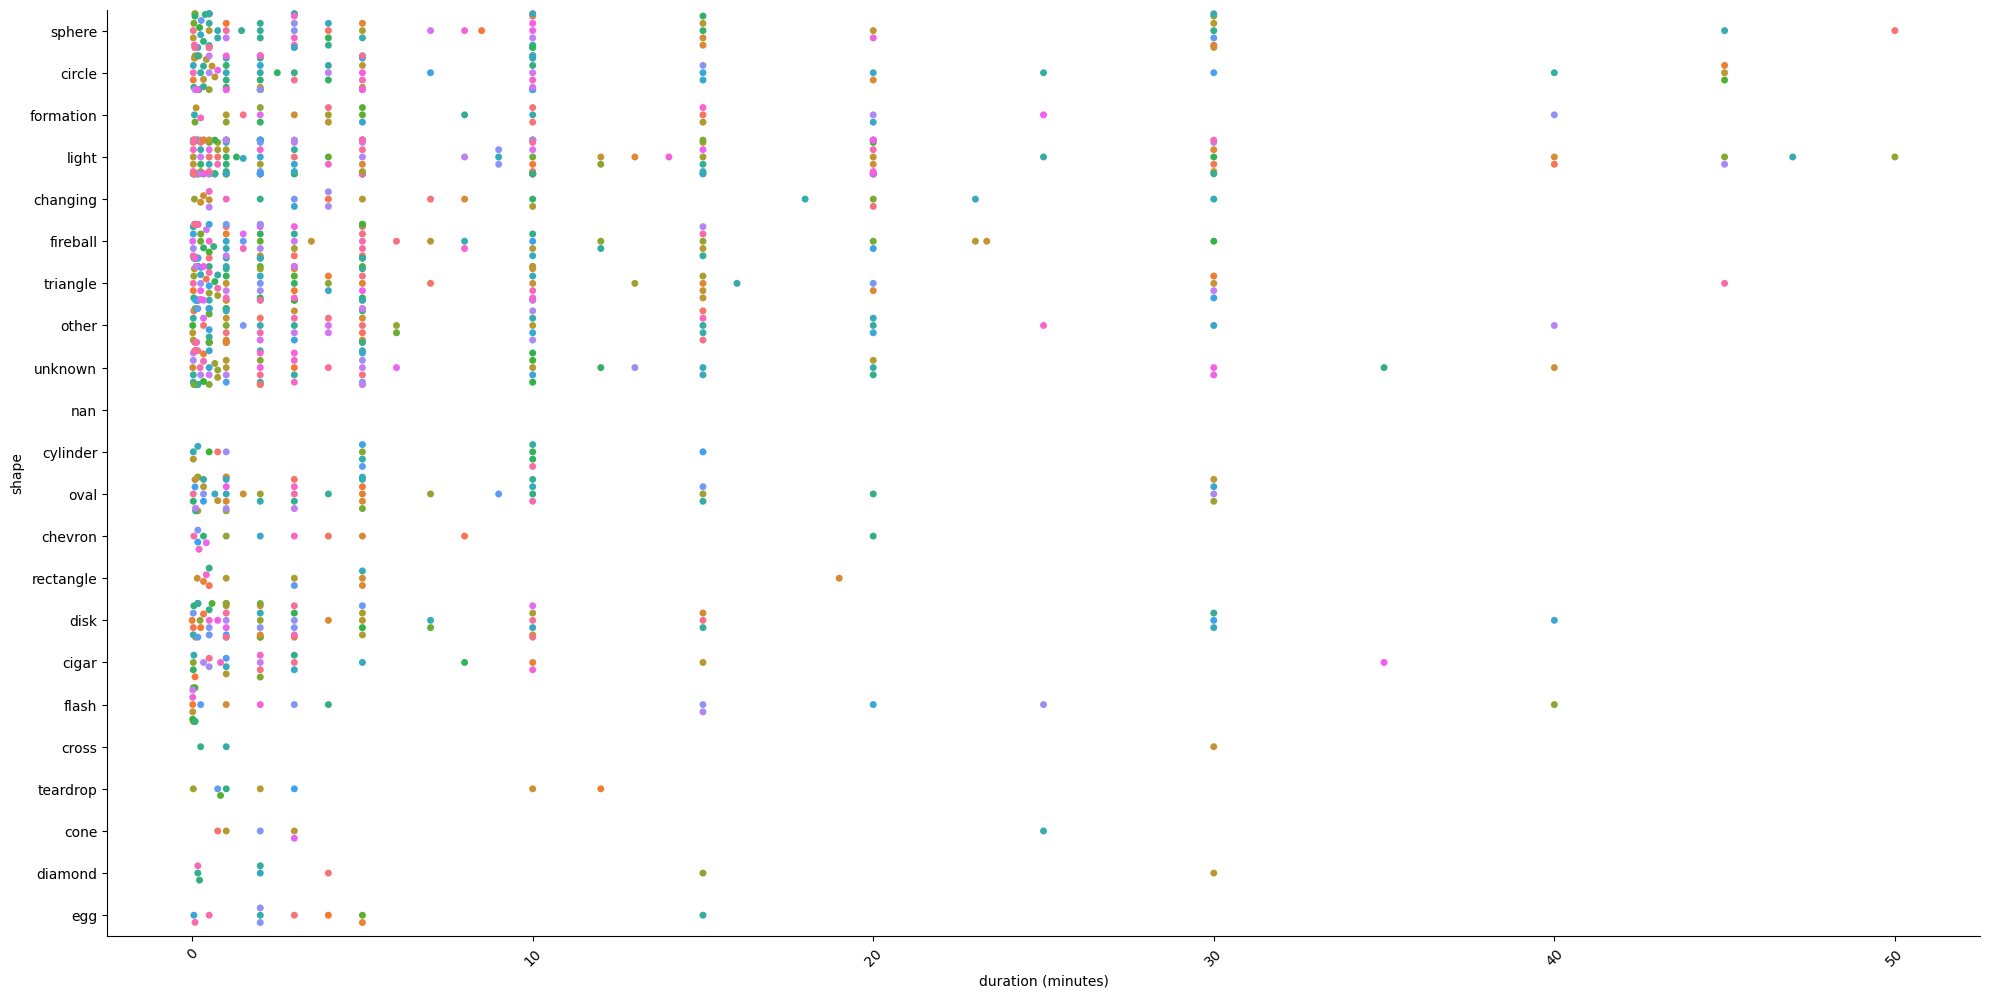

In [16]:
# under 60mins, shape vs duration
sns.catplot(data=df_under60.sample(1000), x="duration (minutes)", y="shape", hue="city", kind="swarm", height=10, aspect=2, legend=False)
plt.xticks(rotation=45)
plt.show()

## City vs Shape
Observations under 100 minutes, sample of 100/80,000.

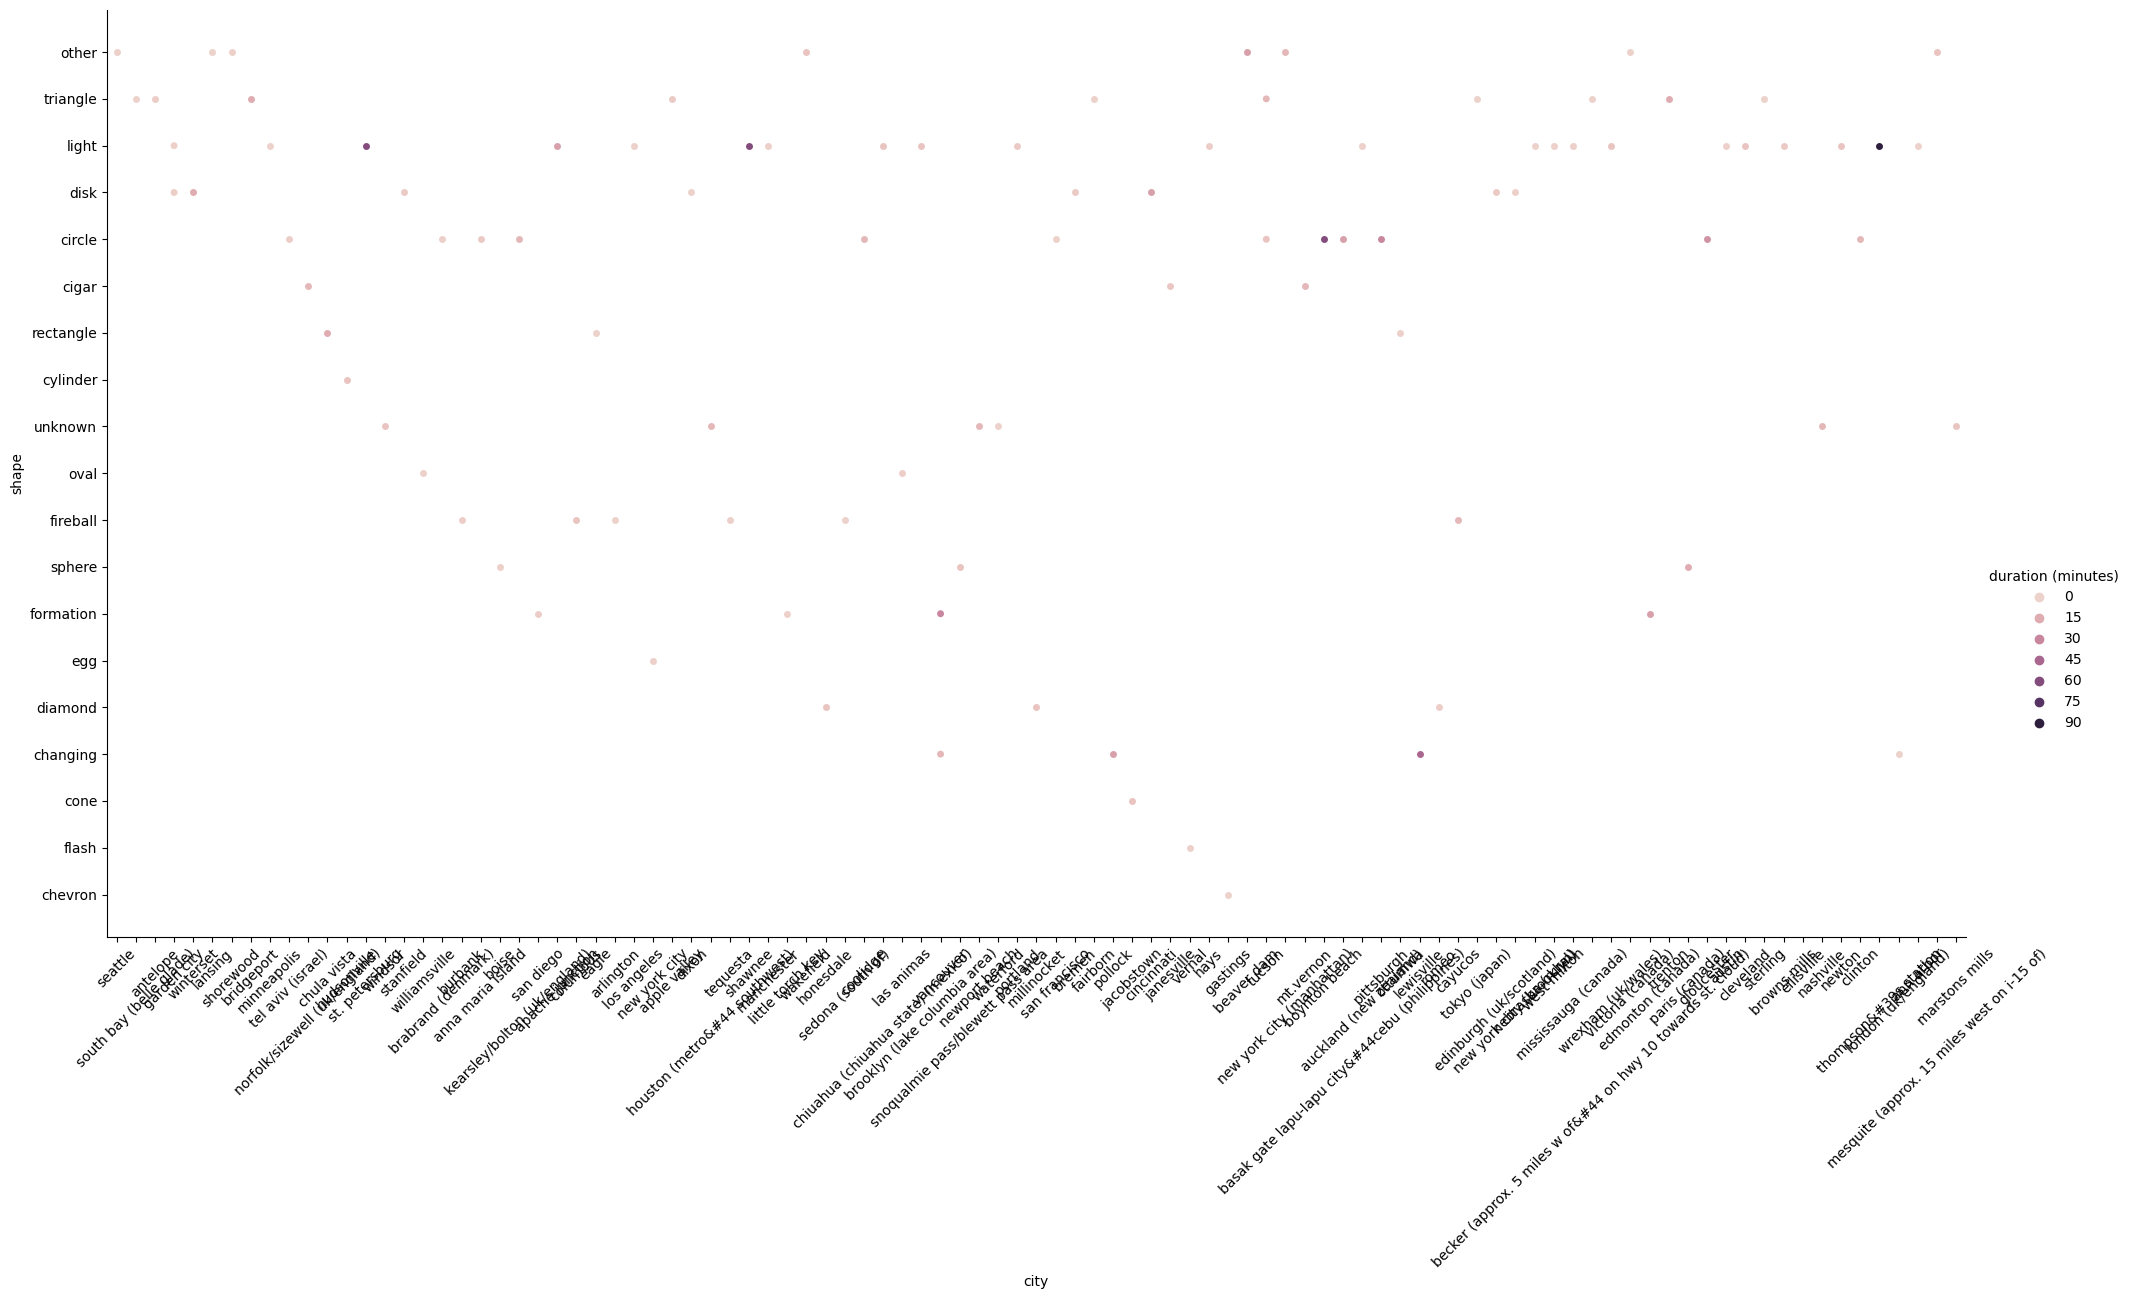

In [17]:
# under 60mins, city vs shape
sns.catplot(data=df_under100.sample(100), x="city", y="shape", hue="duration (minutes)", kind="swarm", height=10, aspect=2, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

## Grouping

### Countries

In [18]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe()

duration (seconds)                                                 \
                     count          mean           std   min   25%    50%   
country                                                                     
au                   538.0   3806.469238  5.434101e+04  0.50  30.0  180.0   
ca                  3000.0  28859.437007  1.511732e+06  0.02  20.0  120.0   
de                   105.0  24255.980952  1.859988e+05  2.00  30.0  180.0   
gb                  1905.0  66061.321207  2.314714e+06  0.30  30.0  180.0   
us                 65114.0   5800.014047  4.045135e+05  0.01  30.0  180.0   

                           latitude             ... comment_length         \
           75%         max    count       mean  ...            75%    max   
country                                         ...                         
au       600.0   1209600.0    538.0 -32.797061  ...          122.5  156.0   
ca       600.0  82800000.0   3000.0  47.193421  ...          118.0  167.0   
de       600.0   1814400.0    105.0  50.603340  ...          118.0  154.0   
gb       600.0  97836000.0   1905.0  52.746508  ...          106.0  184.0   
us       600.0  66276000.0  65114.0  38.357911  ...          119.0  246.0   

        duration (minutes)                                                 \
                     count         mean           std       min       25%   
country                                                                     
au                   538.0    63.441109    905.683478  0.000000  0.500000   
ca                  3000.0   480.990600  25195.541533  0.000000  0.333333   
de                   105.0   404.266349   3099.979941  0.033333  0.500000   
gb                  1905.0  1101.022003  38578.563467  0.000000  0.500000   
us                 65114.0    96.666877   6741.891423  0.000000  0.500000   

                               
         50%   75%        max  
country                        
au       3.0  10.0    20160.0  
ca       2.0  10.0  1380000.0  
de       3.0  10.0    30240.0  
gb       3.0  10.0  1630600.0  
us       3.0  10.0  1104600.0  

[5 rows x 48 columns]

### States

In [19]:
# Groupby by state
state = df.groupby("state")

# Summary statistic of all countries
state.describe().head(15)

duration (seconds)                                                   \
                   count           mean           std   min    25%    50%   
state                                                                       
ab                 333.0    1773.351351  1.451834e+04  1.00  20.00  120.0   
ak                 354.0    4231.830508  3.955662e+04  1.00  60.00  300.0   
al                 691.0    1393.408828  8.507752e+03  0.50  30.00  180.0   
ar                 666.0  100867.138889  2.568102e+06  0.20  45.00  180.0   
az                2689.0    5946.797731  1.373938e+05  0.10  60.00  300.0   
bc                 788.0    1103.225660  4.655865e+03  0.02  14.25  120.0   
ca                9655.0    3928.374984  1.356868e+05  0.10  30.00  180.0   
co                1505.0    3024.394751  6.381016e+04  0.10  20.00  120.0   
ct                 968.0   13089.214928  3.103526e+05  1.00  38.75  180.0   
dc                  99.0    1161.224545  6.913268e+03  0.23  10.00  120.0   
de                 183.0     868.904372  1.942672e+03  1.00  30.00  240.0   
fl                4200.0   13504.459262  8.120066e+05  0.05  30.00  180.0   
ga                1347.0    7968.701633  2.173538e+05  0.10  30.00  180.0   
hi                 353.0   19267.543909  3.360113e+05  1.00  30.00  180.0   
ia                 707.0     949.626591  3.951659e+03  0.50  37.50  180.0   

                         latitude             ... comment_length         \
         75%         max    count       mean  ...            75%    max   
state                                         ...                         
ab     600.0    259200.0    333.0  52.365065  ...         111.00  151.0   
ak     900.0    604800.0    354.0  61.274137  ...         121.75  152.0   
al     600.0    172800.0    691.0  32.699574  ...         119.00  159.0   
ar     600.0  66276000.0    666.0  34.877581  ...         126.00  160.0   
az     900.0   6312000.0   2689.0  33.523128  ...         121.00  167.0   
bc     600.0     86400.0    788.0  49.688057  ...         116.00  167.0   
ca     600.0  10526400.0   9655.0  35.758935  ...         124.00  166.0   
co     600.0   2419200.0   1505.0  39.413942  ...         117.00  163.0   
ct     600.0   9468000.0    968.0  41.428611  ...         116.00  158.0   
dc     600.0     68814.0     99.0  37.551190  ...         134.50  148.0   
de     870.0     14400.0    183.0  39.224209  ...         112.50  149.0   
fl     600.0  52623200.0   4200.0  27.851474  ...         120.00  174.0   
ga     600.0   7894800.0   1347.0  33.403432  ...         119.00  162.0   
hi     600.0   6312000.0    353.0  21.052310  ...         124.00  154.0   
ia     600.0     86400.0    707.0  41.902391  ...         121.50  151.0   

      duration (minutes)                                                      \
                   count         mean           std       min       25%  50%   
state                                                                          
ab                 333.0    29.555856    241.972398  0.016667  0.333333  2.0   
ak                 354.0    70.530508    659.277015  0.016667  1.000000  5.0   
al                 691.0    23.223468    141.795861  0.000000  0.500000  3.0   
ar                 666.0  1681.118969  42801.704618  0.000000  0.750000  3.0   
az                2689.0    99.113264   2289.896558  0.000000  1.000000  5.0   
bc                 788.0    18.387056     77.597751  0.000000  0.237500  2.0   
ca                9655.0    65.472895   2261.446166  0.000000  0.500000  3.0   
co                1505.0    50.406556   1063.502688  0.000000  0.333333  2.0   
ct                 968.0   218.153564   5172.543585  0.016667  0.645833  3.0   
dc                  99.0    19.353535    115.221176  0.000000  0.166667  2.0   
de                 183.0    14.481694     32.377886  0.016667  0.500000  4.0   
fl                4200.0   225.074306  13533.443209  0.000000  0.500000  3.0   
ga                1347.0   132.811680   3622.563858  0.000000  0.500

### Shapes

In [20]:
# Groupby by country
shape = df.groupby("shape")

# Summary statistic of all countries
shape.describe().head(20)

duration (seconds)                                                \
                       count          mean           std       min     25%   
shape                                                                        
changed                  1.0   3600.000000           NaN  3600.000  3600.0   
changing              1962.0   2079.513405  7.978068e+03     1.000   120.0   
chevron                952.0    460.317174  1.350015e+03     0.300    15.0   
cigar                 2057.0   1917.106830  4.070627e+04     0.500    30.0   
circle                7608.0   4767.466062  1.681745e+05     0.050    30.0   
cone                   316.0  82827.405063  1.420360e+06     1.000    50.0   
crescent                 2.0  18905.000000  2.672157e+04    10.000  9457.5   
cross                  233.0    748.519313  1.465068e+03     1.000    60.0   
cylinder              1283.0   3426.512471  7.478695e+04     1.000    40.0   
delta                    7.0   2307.857143  5.341042e+03    15.000    60.0   
diamond               1178.0   1413.628625  7.150893e+03     0.020    60.0   
disk                  5213.0   1460.431677  9.970207e+03     0.330    60.0   
dome                     1.0      2.000000           NaN     2.000     2.0   
egg                    759.0   1886.793281  1.504600e+04     0.100    30.0   
fireball              6208.0   4023.941484  1.615911e+05     0.010    10.0   
flare                    1.0     30.000000           NaN    30.000    30.0   
flash                 1328.0   5330.289421  1.202077e+05     0.001     4.0   
formation             2457.0   1254.048547  1.602640e+04     1.000    30.0   
hexagon                  1.0    240.000000           NaN   240.000   240.0   
light                16565.0  13170.345373  7.781979e+05     0.010    30.0   

                                        latitude             ...  \
               50%      75%         max    count       mean  ...   
shape                                                        ...   
changed     3600.0   3600.0      3600.0      1.0  39.729444  ...   
changing     420.0   1425.0    172800.0   1962.0  37.660586  ...   
chevron       60.0    300.0     21600.0    952.0  37.737863  ...   
cigar        180.0    600.0   1814400.0   2057.0  38.200653  ...   
circle       180.0    600.0  10526400.0   7608.0  37.997053  ...   
cone         300.0    900.0  25248000.0    316.0  37.037475  ...   
crescent   18905.0  28352.5     37800.0      2.0  43.858732  ...   
cross        240.0    720.0     10800.0    233.0  38.306791  ...   
cylinder     180.0    600.0   2631600.0   1283.0  37.595064  ...   
delta        300.0    660.0     14400.0      7.0  39.985913  ...   
diamond      300.0    900.0    172800.0   1178.0  38.358098  ...   
disk         240.0    720.0    259200.0   5213.0  37.479659  ...   
dome           2.0      2.0         2.0      1.0  40.536485  ...   
egg          180.0    600.0    259200.0    759.0  37.156933  ...   
fireball     120.0    300.0  10526400.0   6208.0  38.203542  ...   
flare         30.0     30.0        30.0      1.0  38.581667  ...   
flash         30.0    360.0   3654000.0   1328.0  38.659952  ...   
formation    180.0    600.0    604800.0   2457.0  38.300829  ...   
hexagon      240.0    240.0       240.0      1.0  40.559444  ...   
light        180.0    900.0  66276000.0  16565.0  38.158440  ...   

          comment_length        duration (minutes)                             \
                     75%    max              count         mean           std   
shape                                                                           
changed           133.00  133.0                1.0    60.000000           NaN   
changing          124.75  155.0             1962.0    34.658554    132.967798   
chevron           115.00  157.0              952.0     7.671919     22.500261   
cigar             121.00  246.0             2057.0    31.951766    678.437760   
circle            120.00  163.0             7608.0    79.457740   2802.908611   
co

## Word Cloud

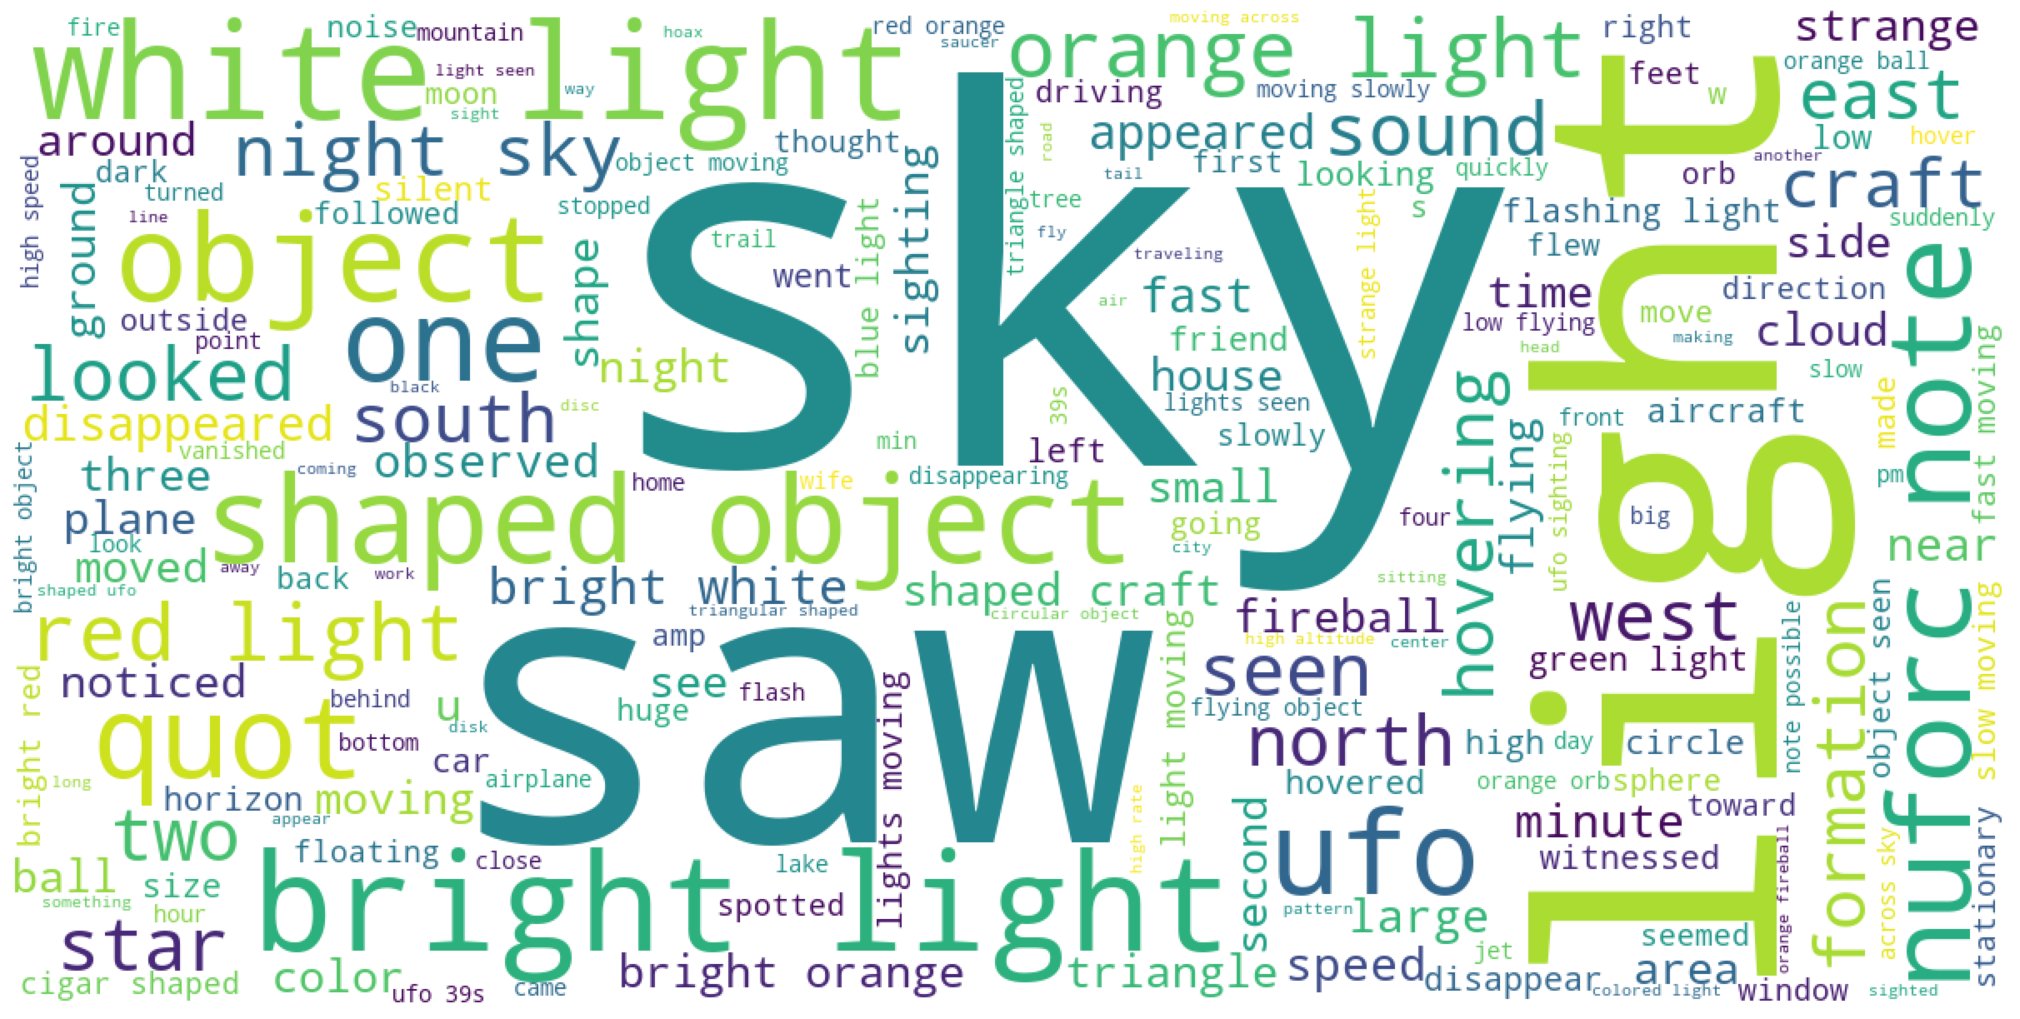

In [21]:
# in the clouds
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 7).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize=(25,10), facecolor='None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### More coming very soon... stand by.
### Stop here - still needs work. Busy week ahead, so standby for updates ;)

# Data Science

# AI - Implementation

# ML - Implementation

# Conclusion

# Contributors & Collaborators

## 🌍A Collaborative Effort🌎

Inspired by: [Mr. Tim Ventura](https://www.youtube.com/channel/UCl1ewEFZwBOTU2I_f0XiSUA) & all you nerdy UAP enthusiasts out there. Let's take this interstellar 🚀 and BEYOND! 

Big thanks to *Kevin Kolbe* for his continuous support & unwavering dedication to presenting only what's true - most importantly for always providing honest feedback.

| [Don's LinkedIn](https://www.linkedin.com/in/dontadaya/) | [Tim's LinkedIn](https://www.linkedin.com/in/timothyventura/) | [Gary's LinkedIn](https://www.linkedin.com/in/garv-gary-van-stephenson-963ba36/) | [Omariba's LinkedIn](https://www.linkedin.com/in/omariba-collins-b28b841b9/) |


### - But, before we get into it -
### Let's all say thanks to [NUFORC](https://nuforc.org/databank/) for sharing the data!
### And most especially a tremendous applause to [Mr. Omariba Collins](https://www.linkedin.com/in/omariba-collins-b28b841b9/) for bringing this phat csv into Kags. 

Feel free to fork, cite, manipulate, scrutinize, comment, and provide insights you deem worthy.

# Notes & Recommendations


Also, look into the latest updates from the National Intelligence Council 
[Assessment of Anomalous Health Incidents](https://www.dni.gov/files/ODNI/documents/assessments/Updated_Assessment_of_Anomalous_Health_Incidents.pdf) regarding anomalous health incidents. Or just see the [latest releases](https://www.dni.gov/index.php/newsroom/reports-publications/reports-publications-2023) from The ODNI to stay informed on all matters of preserving national security. 

### G. Stephenson
Try adding a time sort too to look for correlating events and to possibly form tracks from multiple sightings of the same object. 

Tracks will be especially challenging as these objects are non-ballistic & non-aerodynamic, and have very large spatial 'windows' from sample to sample, i.e. can jump all over the place. So I would recommend starting with a time sort only, and see what the data tells you.


### K. Kolbe
Should exclude shape words from comment counts - especially lights.

(shape vs duration) & (city v shape)


cmap
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter',




https://medium.com/@jl_ruiz/plot-maps-from-the-us-census-bureau-using-geopandas-and-contextily-in-python-df787647ef77

-OFFICE OF THE DIRECTOR OF NATIONAL INTELLIGENCE-

[2022 Annual Report on Unidentified Aerial Phenomena](https://www.dni.gov/files/ODNI/documents/assessments/Unclassified-2022-Annual-Report-UAP.pdf)

APPENDIX B: AARO ESTABLISHMENT OF OFFICE

...

(b) Duties. 

The duties of the Office (...) shall include the following:

(1) Developing procedures to *synchronize and standardize* the collection, reporting, and analysis of incidents, including adverse physiological effects, regarding unidentified aerial phenomena across the Department of Defense and the Intelligence Community.

(2) Developing *processes and procedures* to ensure that such incidents from each component of the Department and each element of the Intelligence Community are reported and incorporated in a *centralized* repository.

(3) Establishing procedures to *require the timely and consistent reporting of such incidents*.

(4) Evaluating links between unidentified aerial phenomena and adversarial foreign governments, other foreign governments, or nonstate actors.

(5) Evaluating the threat that such incidents present to the United States.

(6) Coordinating with other departments and agencies of the Federal Government, as appropriate, including the Federal Aviation Administration, the National Aeronautics and Space Administration, the Department of Homeland Security, the National Oceanic and Atmospheric Administration, and the Department of Energy.

(7) Coordinating with allies and partners of the United States, as appropriate, to better assess the nature and extent of unidentified aerial phenomena.

(8) Preparing reports for Congress, in both classified and unclassified form, including under section (i).
________________________________________________________________

_________________________________________________________________________